<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
import numpy as np

def sum_prod(X, V):
    result = np.zeros_like(V[0])
    
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    
    return result

def test_sum_prod():
    X1 = [np.array([[1, 2], [3, 4]])]
    V1 = [np.array([[1], [2]])]
    expected1 = np.array([[5], [11]])
    assert np.array_equal(sum_prod(X1, V1), expected1)

    X2 = [np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])]
    V2 = [np.array([[1], [1]]), np.array([[2], [2]])]
    expected2 = np.array([[5], [5]])
    assert np.array_equal(sum_prod(X2, V2), expected2)    

    print("Все тесты прошли успешно!")

test_sum_prod()

Все тесты прошли успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M >= threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected1 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(binarize(M1, threshold=0.5), expected1)

    M2 = np.array([[0.1, 0.6], [0.4, 0.9]])
    expected2 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(binarize(M2), expected2)

    print("Все тесты прошли успешно!")

test_binarize()

Все тесты прошли успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
import numpy as np

def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in np.array(mat).T]

def test_unique_elements():
    # Тестовая матрица
    mat = [
        [1, 2, 2, 3],
        [4, 4, 4, 4],
        [5, 6, 7, 6],
        [8, 9, 8, 9]
    ]
    
    # Проверка для строк
    row_uniques = unique_rows(mat)
    assert len(row_uniques) == 4
    assert np.array_equal(row_uniques[0], [1, 2, 3])
    assert np.array_equal(row_uniques[1], [4])
    assert np.array_equal(row_uniques[2], [5, 6, 7])
    assert np.array_equal(row_uniques[3], [8, 9])
    
    # Проверка для столбцов
    col_uniques = unique_columns(mat)
    assert len(col_uniques) == 4
    assert np.array_equal(col_uniques[0], [1, 4, 5, 8])
    assert np.array_equal(col_uniques[1], [2, 4, 6, 9])
    assert np.array_equal(col_uniques[2], [2, 4, 7, 8])
    assert np.array_equal(col_uniques[3], [3, 4, 6, 9])

    print("Все тесты прошли успешно!")

test_unique_elements()

Все тесты прошли успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Среднее по строкам: [-0.57550464  0.32390986  0.13480865]
Дисперсия по строкам: [0.6183219  0.15798267 0.27785821]

Среднее по столбцам: [-0.02973711 -0.18011137  0.52175426 -0.4676206 ]
Дисперсия по столбцам: [0.41727525 0.38883871 0.21813308 0.46281114]


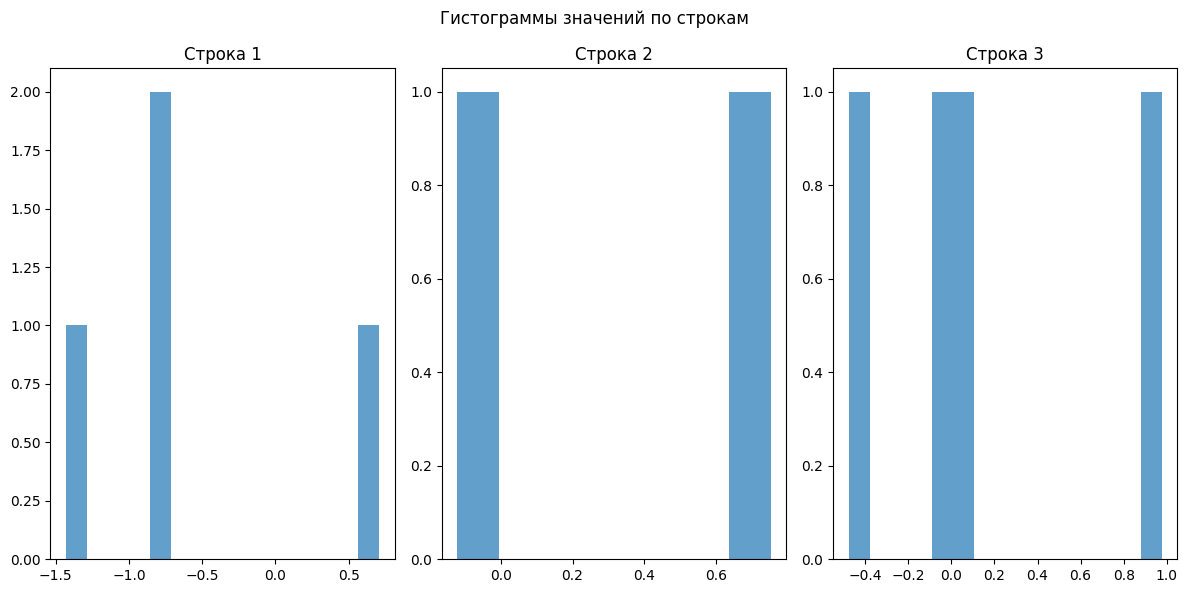

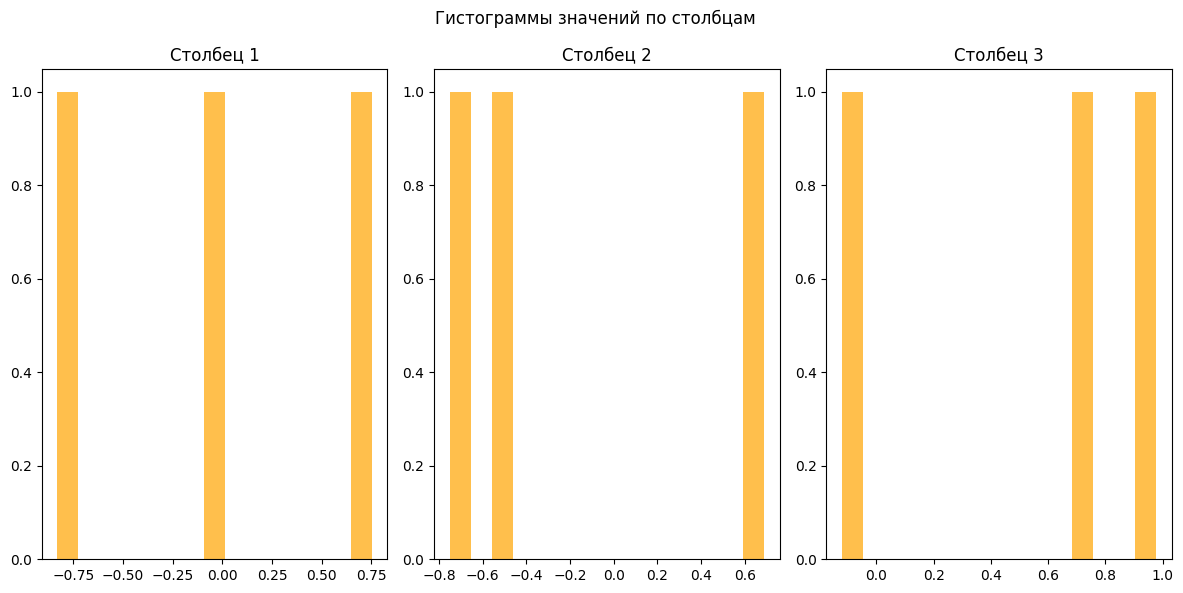

Все тесты прошли успешно!


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_normal_matrix(m, n, mu=0, sigma=1):
    mat = np.random.normal(loc=mu, scale=sigma, size=(m, n))
    
    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)
    
    print("Среднее по строкам:", row_means)
    print("Дисперсия по строкам:", row_vars)
    print("\nСреднее по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_vars)
    
    plt.figure(figsize=(12, 6))
    for i in range(min(3, m)):
        plt.subplot(1, 3, i+1)
        plt.hist(mat[i, :], bins=15, alpha=0.7)
        plt.title(f'Строка {i+1}')
    plt.suptitle('Гистограммы значений по строкам')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    for j in range(min(3, n)):
        plt.subplot(1, 3, j+1)
        plt.hist(mat[:, j], bins=15, alpha=0.7, color='orange')
        plt.title(f'Столбец {j+1}')
    plt.suptitle('Гистограммы значений по столбцам')
    plt.tight_layout()
    plt.show()
    
    return mat

def test_matrix_analysis():
    m, n = 3, 4
    mat = analyze_normal_matrix(m, n)
    assert mat.shape == (m, n)
    
    test_mat = np.array([[1, 2], [3, 4]])
    row_means = np.mean(test_mat, axis=1)
    assert np.allclose(row_means, [1.5, 3.5])
    
    col_vars = np.var(test_mat, axis=0)
    assert np.allclose(col_vars, [1.0, 1.0])
    
    print("Все тесты прошли успешно!")

test_matrix_analysis()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [17]:
import numpy as np

def chess(m, n, a, b):
    if m == 0 and n == 0:
        return np.array([])

    mat = np.zeros((m, n), dtype=int)

    mat[::2, ::2] = a
    mat[1::2, 1::2] = a
    mat[::2, 1::2] = b
    mat[1::2, ::2] = b

    return mat

def test_chess():
    result = chess(2, 2, 1, 0)
    expected = np.array([[1, 0], [0, 1]])
    assert np.array_equal(result, expected), f"Тест 1 провален. Ожидалось: {expected}, Получено: {result}"

    result = chess(0, 0, 0, 1)
    expected = np.array([])
    assert np.array_equal(result, expected), f"Тест 3 провален. Ожидалось: {expected}, Получено: {result}"

    result = chess(2, 5, 7, 3)
    expected = np.array([[7, 3, 7, 3, 7], [3, 7, 3, 7, 3]])
    assert np.array_equal(result, expected), f"Тест 5 провален. Ожидалось: {expected}, Получено: {result}"

    print("Все тесты успешно пройдены!")

test_chess()

Все тесты успешно пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

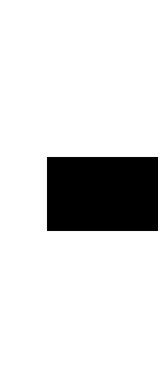

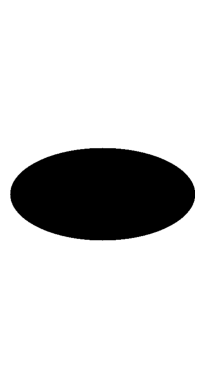

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    start_x = (n - a) // 2
    start_y = (m - b) // 2
    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    y, x = np.ogrid[:m, :n]
    center_x, center_y = n // 2, m // 2
    mask = ((x - center_x) ** 2) / (a ** 2) + ((y - center_y) ** 2) / (b ** 2) <= 1
    image[mask] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()


draw_rectangle(500, 100, 500, 200, (0, 0, 0), (255, 255, 255))
draw_ellipse(200, 100, 800, 400, (0, 0, 0), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [30]:
import numpy as np

time_series = np.random.rand(50)

mean_value, var_value, deviation = np.mean(time_series), np.var(time_series), np.std(time_series)
print(f"Среднее: {mean_value:.4f}\nДисперсия: {var_value:.4f}\nСтандартное отклонение: {deviation:.4f}")

is_max = (time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:])
is_min = (time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:])

local_max = np.where(is_max)[0] + 1
local_min = np.where(is_min)[0] + 1

print("\nЛокальные максимумы:", time_series[local_max])
print("Локальные минимумы:", time_series[local_min])

p = 10
moving_average = np.convolve(time_series, np.ones(p)/p, 'valid')
print("\nСкользящее среднее (окно=10):", moving_average)

Среднее: 0.5326
Дисперсия: 0.0683
Стандартное отклонение: 0.2613

Локальные максимумы: [0.89615414 0.513349   0.54256296 0.8348383  0.21755175 0.9016592
 0.74183067 0.80706748 0.4076246  0.94854895 0.73171987 0.43664295
 0.67593604 0.57346149 0.9774869  0.90099377 0.97696537]
Локальные минимумы: [0.31433502 0.10493297 0.44962503 0.37516105 0.16334589 0.18551785
 0.31413532 0.57365658 0.15476673 0.22581431 0.42274417 0.35947328
 0.08271292 0.27861361 0.32552045 0.60594305 0.66374715 0.87820735]

Скользящее среднее (окно=10): [0.47333165 0.44310389 0.4313296  0.36346936 0.37160974 0.36648808
 0.37380753 0.41901095 0.39616818 0.43283514 0.40671697 0.47108913
 0.49683948 0.49056097 0.51268975 0.5167194  0.49192196 0.49661094
 0.52917371 0.508291   0.49319976 0.485665   0.47620277 0.50439039
 0.47189923 0.5169114  0.53981733 0.4728238  0.46619365 0.44544533
 0.48075974 0.50533645 0.53175323 0.54868324 0.63051133 0.64609292
 0.65621966 0.69473302 0.73508341 0.7903521  0.80898598]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [36]:
import numpy as np

def one_hot_encoding(labels):
    unique_labels = np.unique(labels)
    num_classes = unique_labels.max() + 1 
    result = np.zeros((len(labels), num_classes))
    
    for i, label in enumerate(labels):
        result[i, label] = 1
    
    return result

labels = np.array([0, 2, 3, 0, 1])
encoded = one_hot_encoding(labels)
print(encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
